# Decision Trees
by Ben Royles

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Decision Trees</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Undersampling-the-majority-class" data-toc-modified-id="Undersampling-the-majority-class-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Undersampling the majority class</a></span></li></ul></li><li><span><a href="#Gradient-Boost" data-toc-modified-id="Gradient-Boost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gradient Boost</a></span></li><li><span><a href="#Subset-of-columns" data-toc-modified-id="Subset-of-columns-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Subset of columns</a></span><ul class="toc-item"><li><span><a href="#Random-forest" data-toc-modified-id="Random-forest-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Random forest</a></span></li><li><span><a href="#Grad-boost" data-toc-modified-id="Grad-boost-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Grad boost</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set()

df = pd.read_csv('complete.csv')
df.shape

(61845, 216)

In [2]:
# Getting a list of all the columns to be able to remove the non-numeric and predictive ones
df.columns.tolist()

['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'Match Week',
 'FullTimeResult',
 'DistanceTraveled in Km',
 'Weekday',
 'Month',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away',
 'Points before match_home',
 'Points before match_away',
 'League Position_home',
 'League Position_away',
 'Form_home',
 'Form_away',
 'AverageFullTimeGoalsFor_home',
 'AverageFullTimeGoalsFor_away',
 'AverageFullTimeGoalsAgainst_home',
 'AverageFullTimeGoalsAgainst_away',
 'AverageHalfTimeGoalsFor_home',
 'AverageHalfTimeGoalsFor_away',
 'AverageHalfTimeGoalsAgainst_home',
 'AverageHalfTimeGoalsAgainst_away',
 'AverageShots_home',
 'AverageShots_away',
 'AverageShotsAgainst_home',
 'AverageShotsAgainst_away',
 'A

In [3]:
df.drop(['id',
 'League',
 'Season',
 'Date',
 'Team',
 'Against',
 'HomeStadium',
 'HomeCapacity',
 'DistanceTraveled in Km',
 'FullTimeGoalsFor_home',
 'FullTimeGoalsFor_away',
 'FullTimeGoalsAgainst_home',
 'FullTimeGoalsAgainst_away',
 'HalfTimeGoalsFor_home',
 'HalfTimeGoalsFor_away',
 'HalfTimeGoalsAgainst_home',
 'HalfTimeGoalsAgainst_away',
 'HalfTimeResult_home',
 'HalfTimeResult_away',
 'Points_home',
 'Points_away'], axis=1, inplace=True)

In [4]:
df.dropna(inplace=True)
df.shape

(44565, 195)

In [5]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult']

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create the GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(decision_tree, param_grid_dt, cv=5, scoring='accuracy')

# Fit the GridSearchCV object on the training data
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_

# Evaluate the best model on the test data
accuracy_dt = best_model_dt.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters for Decision Tree:", best_params_dt)
print("Accuracy of the Best Decision Tree Model:", accuracy_dt)


Best Hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy of the Best Decision Tree Model: 0.48861213957141253


Using the grid search I have been able to find the optimum combination of parameters for a decision tree model. This has scored an accuracy of 48.9% on the testing set. I will visualize the strengths and weaknesses of the model below, using a confusion matrix and heat map.

Classification Report:


C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\benro\anaconda3\envs\ensemble\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           A       0.46      0.38      0.41      2601
           D       0.00      0.00      0.00      2350
           H       0.50      0.85      0.63      3962

    accuracy                           0.49      8913
   macro avg       0.32      0.41      0.35      8913
weighted avg       0.36      0.49      0.40      8913

0.48861213957141253


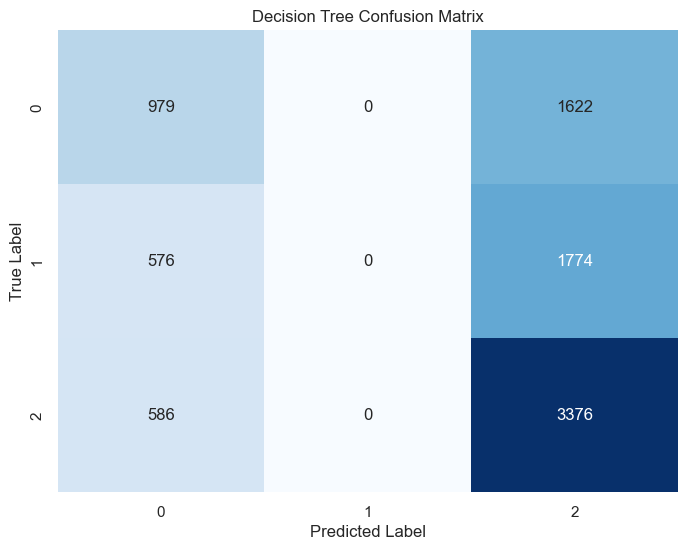

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


y_test_pred = best_model_dt.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model_dt.score(X_test, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Decision Tree Confusion Matrix")
plt.show()

We can see that the model is heavily biased towards class 2, home wins. As a result, 50% of the predicted home wins are actually a mixture of away wins and draws. The model performs worse with away wins, class 0, and doesn't predict any draws, class 1.

# Random Forest


In [9]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# Fit the GridSearchCV object on the scaled training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test data
accuracy_rf = best_model_rf.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters for Random Tree:", best_params_rf)
print("Accuracy of the Best Decision Tree Model:", accuracy_rf)

Best Hyperparameters for Random Tree: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy of the Best Decision Tree Model: 0.5019634242118254


Using a grid search to find the optimum Hyper parameters for a random forest classifier produced a model that scored 50.2% accuracy on the testing set.

Classification Report:
              precision    recall  f1-score   support

           A       0.49      0.40      0.44      2601
           D       0.29      0.00      0.00      2350
           H       0.51      0.86      0.64      3962

    accuracy                           0.50      8913
   macro avg       0.43      0.42      0.36      8913
weighted avg       0.44      0.50      0.41      8913

0.5019634242118254


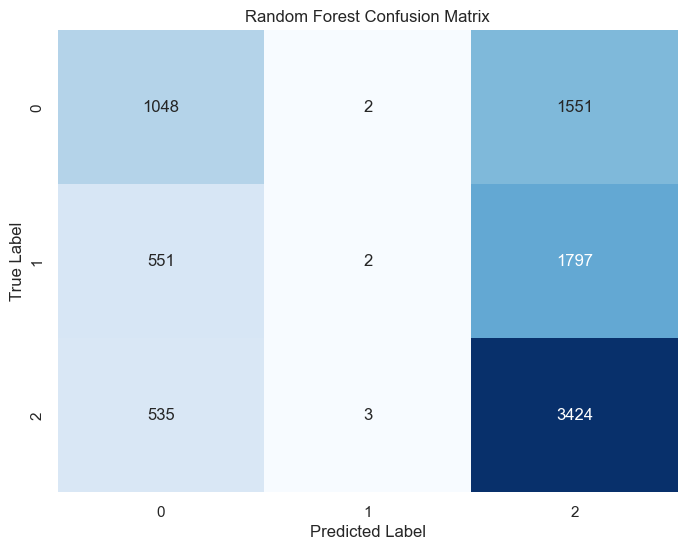

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_test_pred = best_model_rf.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model_rf.score(X_test, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.show()

Looking at the confusion matrix and classification report we can see that it has a similar level of precision for both home and away wins, 51% and 49% respectively. The recall for class 2, home wins, is significantly higher which means that a relatively small proportion of home wins are incorrectly classified. This is due to the model favoring home wins which could be caused by the uneven distribution of the classes.

## Undersampling the majority class

In [12]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts()

H    15544
A    10803
D     9305
Name: FullTimeResult, dtype: int64

In [13]:
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)

X_train, y_train = under_sampler.fit_resample(X_train, y_train)

y_train.value_counts()


A    9305
D    9305
H    9305
Name: FullTimeResult, dtype: int64

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# Fit the GridSearchCV object on the scaled training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test data
accuracy_rf = best_model_rf.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters for Random Tree:", best_params_rf)
print("Accuracy of the Best Decision Tree Model:", accuracy_rf)

Best Hyperparameters for Random Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy of the Best Decision Tree Model: 0.46718276674520365


Balancing the number of samples from each class has reduced the overall accuracy to 46.7, which is quite a significant decrease. The confusion matrix and classification report will help to clarify why the model has got worse.

Classification Report:
              precision    recall  f1-score   support

           A       0.46      0.49      0.48      2601
           D       0.31      0.38      0.34      2350
           H       0.61      0.50      0.55      3962

    accuracy                           0.47      8913
   macro avg       0.46      0.46      0.46      8913
weighted avg       0.49      0.47      0.47      8913

0.46718276674520365


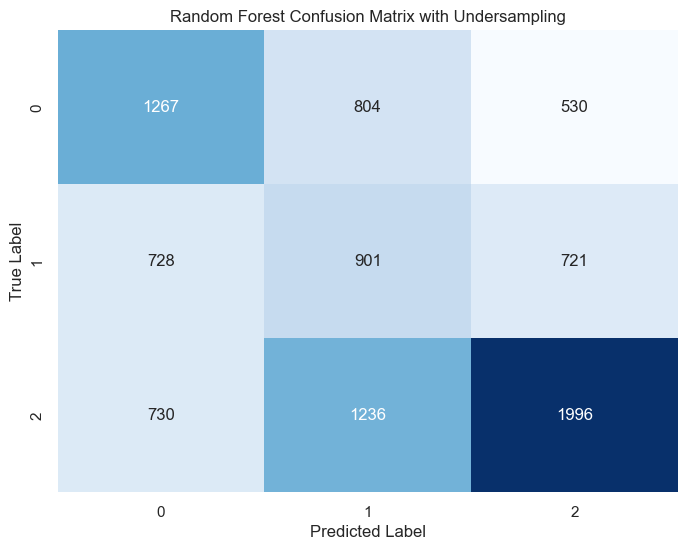

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_test_pred = best_model_rf.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model_rf.score(X_test, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix with Undersampling")
plt.show()

Compared to the original random forest model, the distribution of predictions is much more evenly spread, resulting in a higher precision. The recall is lower, but more evenly distributed among the three classes, instead of being heavily biased towards class 2, home wins.

# Gradient Boost

In [16]:
X = df.drop(['FullTimeResult'], axis=1)
y = df['FullTimeResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5)

# Fit the GridSearchCV object on the scaled training data
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters and the best model for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model on the test data
accuracy_gb = best_model_gb.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters for Random Tree:", best_params_gb)
print("Accuracy of the Best Decision Tree Model:", accuracy_gb)

Best Hyperparameters for Random Tree: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Accuracy of the Best Decision Tree Model: 0.5030853809042971


Classification Report:
              precision    recall  f1-score   support

           A       0.47      0.46      0.46      2601
           D       0.37      0.02      0.04      2350
           H       0.52      0.82      0.64      3962

    accuracy                           0.50      8913
   macro avg       0.45      0.43      0.38      8913
weighted avg       0.46      0.50      0.43      8913

0.5030853809042971


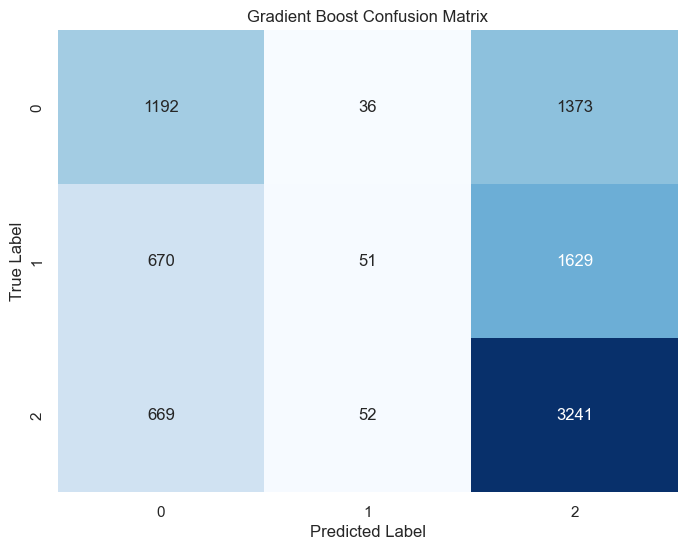

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_test_pred = best_model_gb.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model_gb.score(X_test, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gradient Boost Confusion Matrix")
plt.show()

# Subset of columns


## Random forest


In [19]:
df.columns.tolist()

['Match Week',
 'FullTimeResult',
 'Weekday',
 'Month',
 'Points before match_home',
 'Points before match_away',
 'League Position_home',
 'League Position_away',
 'Form_home',
 'Form_away',
 'AverageFullTimeGoalsFor_home',
 'AverageFullTimeGoalsFor_away',
 'AverageFullTimeGoalsAgainst_home',
 'AverageFullTimeGoalsAgainst_away',
 'AverageHalfTimeGoalsFor_home',
 'AverageHalfTimeGoalsFor_away',
 'AverageHalfTimeGoalsAgainst_home',
 'AverageHalfTimeGoalsAgainst_away',
 'AverageShots_home',
 'AverageShots_away',
 'AverageShotsAgainst_home',
 'AverageShotsAgainst_away',
 'AverageShotsOnTarget_home',
 'AverageShotsOnTarget_away',
 'AverageShotsOnTargetAgainst_home',
 'AverageShotsOnTargetAgainst_away',
 'AverageFoulsCommited_home',
 'AverageFoulsCommited_away',
 'AverageFoulsAgainst_home',
 'AverageFoulsAgainst_away',
 'AverageCorners_home',
 'AverageCorners_away',
 'AverageCornersAgainst_home',
 'AverageCornersAgainst_away',
 'AverageYellowCards_home',
 'AverageYellowCards_away',
 'Averag

In [20]:
X_df = df[['Match Week',
 'Weekday',
 'Month',
 'Points before match_home',
 'Points before match_away',
 'League Position_home',
 'League Position_away',
 'Form_home',
 'Form_away',
 'AverageFullTimeGoalsFor_home',
 'AverageFullTimeGoalsFor_away',
 'AverageFullTimeGoalsAgainst_home',
 'AverageFullTimeGoalsAgainst_away',
 'AverageHalfTimeGoalsFor_home',
 'AverageHalfTimeGoalsFor_away',
 'AverageHalfTimeGoalsAgainst_home',
 'AverageHalfTimeGoalsAgainst_away',
 'AverageShots_home',
 'AverageShots_away',
 'AverageShotsAgainst_home',
 'AverageShotsAgainst_away',
 'AverageShotsOnTarget_home',
 'AverageShotsOnTarget_away',
 'AverageShotsOnTargetAgainst_home',
 'AverageShotsOnTargetAgainst_away',
 'AverageFoulsCommited_home',
 'AverageFoulsCommited_away',
 'AverageFoulsAgainst_home',
 'AverageFoulsAgainst_away',
 'AverageCorners_home',
 'AverageCorners_away',
 'AverageCornersAgainst_home',
 'AverageCornersAgainst_away', 
 'FullTimeResult']].copy()






In [21]:
X_df.dropna(inplace=True)
X_df.shape

(44565, 34)

In [22]:
X = X_df.drop(['FullTimeResult'], axis=1)
y = X_df['FullTimeResult']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5)

# Fit the GridSearchCV object on the scaled training data
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model for Random Forest
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best Random Forest model on the test data
accuracy_rf = best_model_rf.score(X_test, y_test)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters are:", best_params_rf)
print("Accuracy of the Best accuracy is:", accuracy_rf)

Best Hyperparameters are: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy of the Best accuracy is: 0.5020756198810726


Classification Report:
              precision    recall  f1-score   support

           A       0.48      0.43      0.45      2601
           D       0.35      0.00      0.01      2350
           H       0.51      0.84      0.64      3962

    accuracy                           0.50      8913
   macro avg       0.45      0.43      0.37      8913
weighted avg       0.46      0.50      0.42      8913

0.5020756198810726


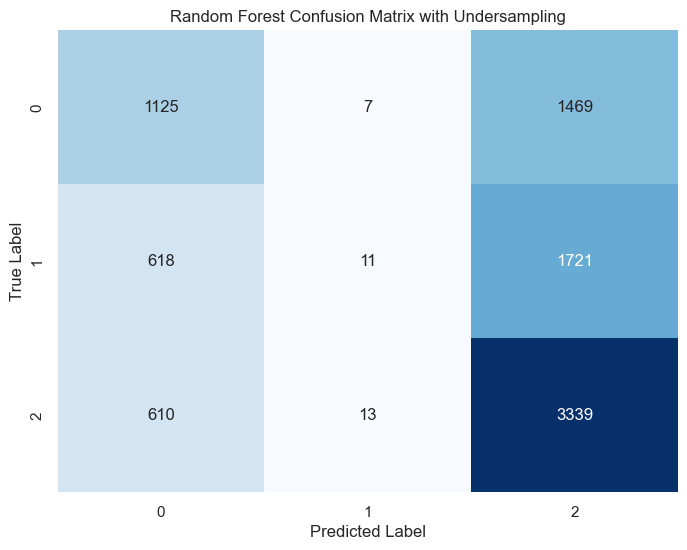

In [25]:
y_test_pred = best_model_rf.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model_rf.score(X_test, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix with Undersampling")
plt.show()

## Grad boost


In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Define the hyperparameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Create the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV object for Gradient Boosting
grid_search_gb = GridSearchCV(gradient_boosting, param_grid_gb, cv=5)

# Fit the GridSearchCV object on the scaled training data
grid_search_gb.fit(X_train, y_train)

# Get the best hyperparameters and the best model for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_

# Evaluate the best Gradient Boosting model on the test data
accuracy_gb = best_model_gb.score(X_test, y_test)


print(best_params_gb)
print(accuracy_gb)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
0.5023000112195669


Classification Report:
              precision    recall  f1-score   support

           A       0.47      0.46      0.46      2601
           D       0.38      0.03      0.05      2350
           H       0.52      0.81      0.63      3962

    accuracy                           0.50      8913
   macro avg       0.45      0.43      0.38      8913
weighted avg       0.47      0.50      0.43      8913

0.5023000112195669


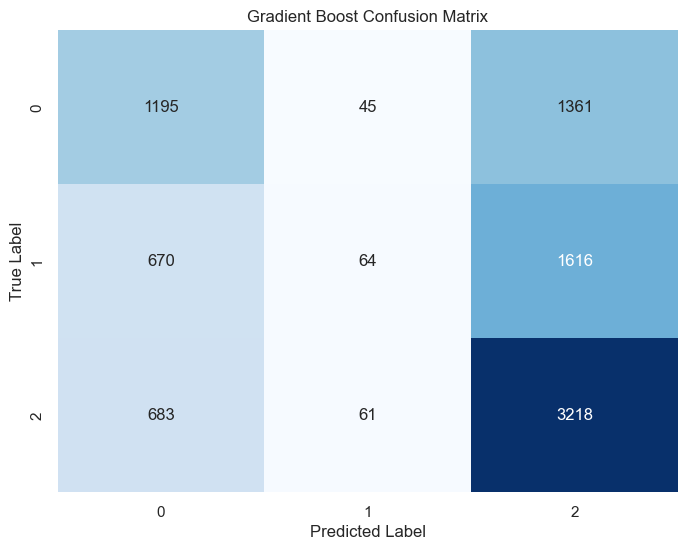

In [27]:
y_test_pred = best_model_gb.predict(X_test)

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
print(best_model_gb.score(X_test, y_test))

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gradient Boost Confusion Matrix")
plt.show()

We can also look at the strongest decision boundaries to get a better understanding of what features are important.

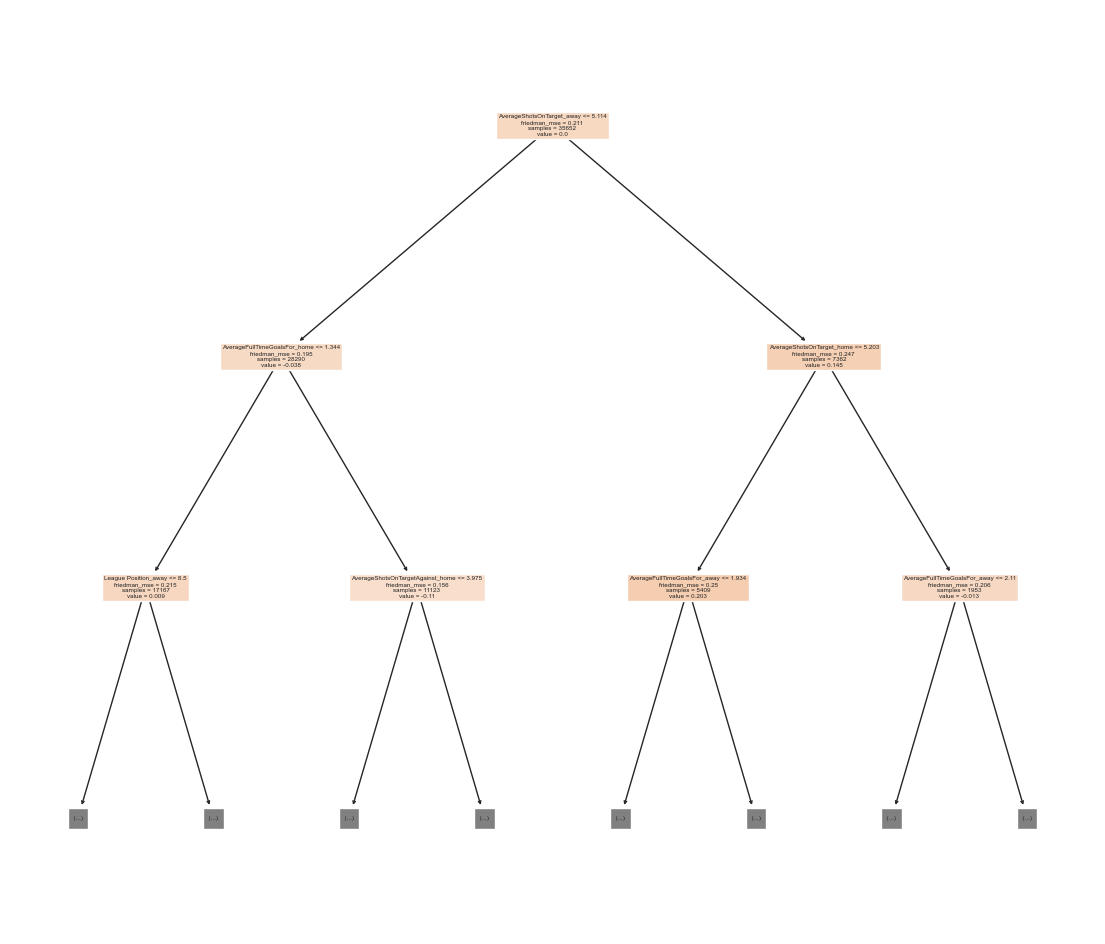

In [29]:
from sklearn.tree import plot_tree
# Get the first decision tree in the ensemble
first_tree = best_model_gb.estimators_[0][0]

# Get the feature names from the X_train DataFrame
feature_names = X_train.columns

# Plot the first decision tree with the top 2 levels and include feature names
plt.figure(figsize=(14, 12))
plot_tree(first_tree, filled=True, max_depth=2, feature_names=feature_names)
plt.show()